#### sklearn.metrics.roc_curve
* sklearn.metrics.roc_curve(_y_true_, _y_score_, _*_, _pos_label=None_, _sample_weight=None_, _drop_intermediate=True_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/f3f51f9b6/sklearn/metrics/_ranking.py#L892)[¶](https://scikit-learn.org/1.1/modules/generated/sklearn.metrics.roc_curve.html?highlight=roc+curve#sklearn.metrics.roc_curve "Permalink to this definition")
Compute Receiver operating characteristic (ROC).

Note: this implementation is restricted to the binary classification task.

Read more in the  [User Guide](https://scikit-learn.org/1.1/modules/model_evaluation.html#roc-metrics).
* Returns:

**fpr**ndarray of shape (>2,)

Increasing false positive rates such that element i is the false positive rate of predictions with score >=  `thresholds[i]`.

**tpr**ndarray of shape (>2,)

Increasing true positive rates such that element  `i`  is the true positive rate of predictions with score >=  `thresholds[i]`.

**thresholds**ndarray of shape = (n_thresholds,)

Decreasing thresholds on the decision function used to compute fpr and tpr.  `thresholds[0]`  represents no instances being predicted and is arbitrarily set to  `max(y_score)  +  1`.

In [4]:
import pandas as pd

tt_df = pd.read_csv('c:/Users/seopa/Downloads/titanic_train.csv')
tt_df_test = pd.read_csv('c:/Users/seopa/Downloads/titanic_test.csv')

from sklearn.preprocessing import LabelEncoder

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId','Name','SibSp','Ticket','Parch','Fare'], axis=1, inplace=True)
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

tt_df_1 = transform_features(tt_df)
tt_df_test_1 = transform_features(tt_df_test)

# label, feature 
label = tt_df_1['Survived']
features = tt_df_1.drop(columns='Survived')

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(features, label)
lr_pred = lr_clf.predict(tt_df_test_1)

pred_proba = lr_clf.predict_proba(tt_df_test_1)
print(pred_proba[:3])
print(lr_pred[:3])

[[0.90004657 0.09995343]
 [0.56777228 0.43222772]
 [0.89778678 0.10221322]]
[0 0 0]


In [5]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

y_test = pd.read_csv('c:/Users/seopa/Downloads/titanic_test_y.csv')
y_test = y_test['Survived']
threshold_arr = np.linspace(0, 1, num=20, endpoint=False)

def get_clf_eval(y_test, pred):
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test, pred)
    return (precision, recall)

In [26]:
from sklearn.preprocessing import Binarizer

from sklearn.metrics import f1_score

f1 = f1_score(y_test, lr_pred)
print(f1)

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도:',round(accuracy,3),'정밀도:', round(precision,3),'재현률:', round(recall,3))


def get_eval_by_threshold(y_test, pred_proba, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba)
        custom_predict = binarizer.transform(pred_proba)
        get_clf_eval(y_test, custom_predict)
    
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(tt_df_test_1)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1),thresholds)

0.9287925696594427
오차행렬
[[223  43]
 [  0 152]]
정확도: 0.897 정밀도: 0.779 재현률: 1.0
오차행렬
[[237  29]
 [  2 150]]
정확도: 0.926 정밀도: 0.838 재현률: 0.987
오차행렬
[[245  21]
 [  2 150]]
정확도: 0.945 정밀도: 0.877 재현률: 0.987
오차행렬
[[253  13]
 [  7 145]]
정확도: 0.952 정밀도: 0.918 재현률: 0.954
오차행렬
[[258   8]
 [ 23 129]]
정확도: 0.926 정밀도: 0.942 재현률: 0.849


In [7]:
from sklearn.metrics import roc_curve
import numpy as np

pred_proba_class1 = lr_clf.predict_proba(tt_df_test_1)[:,1]

fprs, tprs, thresholds = roc_curve(y_test,pred_proba_class1)

thr_index = np.arange(1, thresholds.shape[0], 5)

print(fprs)
print(tprs)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.0037594
 0.0037594  0.0075188  0.0075188  0.0075188  0.0075188  0.0075188
 0.0075188  0.0075188  0.0112782  0.0112782  0.0112782  0.01503759
 0.01503759 0.01879699 0.01879699 0.03007519 0.03007519 0.03383459
 0.03383459 0.03759398 0.03759398 0.04135338 0.04135338 0.04511278
 0.04511278 0.04511278 0.04887218 0.04887218 0.06015038 0.06015038
 0.06766917 0.06766917 0.07518797 0.07518797 0.10902256 0.10902256
 0.12030075 0.12030075 0.14285714 0.15789474 0.22932331 0.23684211
 0.26315789 0.27443609 0.28947368 0.30075188 0.30827068 0.31954887
 0.32706767 0.33834586 0.34210526 0.34962406 0.37218045 0.38721805
 0.39473684 0.40225564 0.45112782 0.46240602 0.47368421 0.4887218
 0.5075188  0.51503759 0.52255639 0.54511278 0.55639098 0.56390977
 0.61278195 0.62030075 0.64661654 0.65037594 0.67293233 0.69548872
 0.71052632 0.

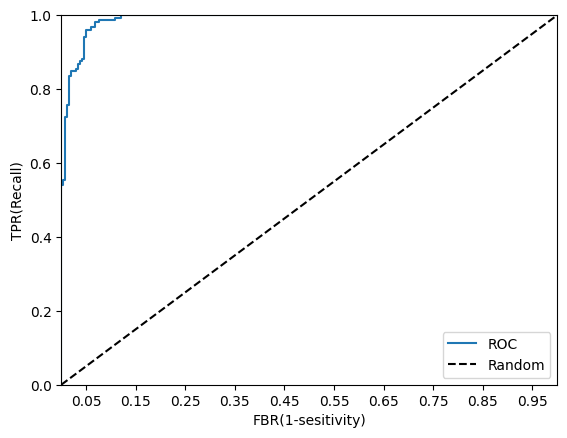

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def roc_curve_plot(y_test, pred_proba):
    fprs, tprs, thresholds = roc_curve(y_test,pred_proba_class1)
    
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1], 'k--', label='Random')
             
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1) 
    plt.ylim(0,1)
    plt.xlabel('FBR(1-sesitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()

roc_curve_plot(y_test, pred_proba_class1)

In [11]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(tt_df_test_1)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print(roc_score)

0.9887712702809656
